### Titanic Survival Prediction

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\train.csv")         
test = pd.read_csv("C:\\Users\\Dell\\Downloads\\titanic_test.csv")   

### Data Exploration

In [7]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Figure size 800x500 with 0 Axes>

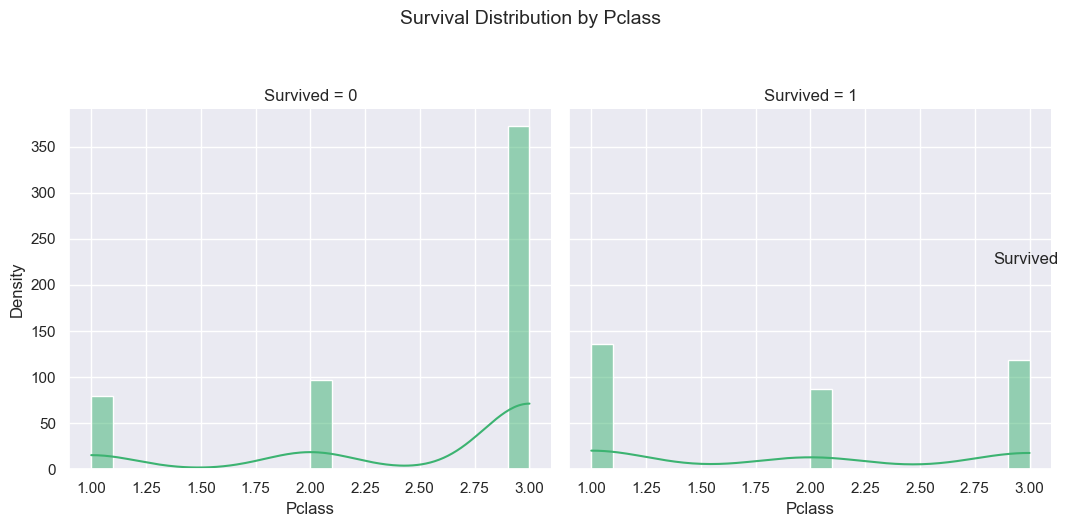

<Figure size 800x500 with 0 Axes>

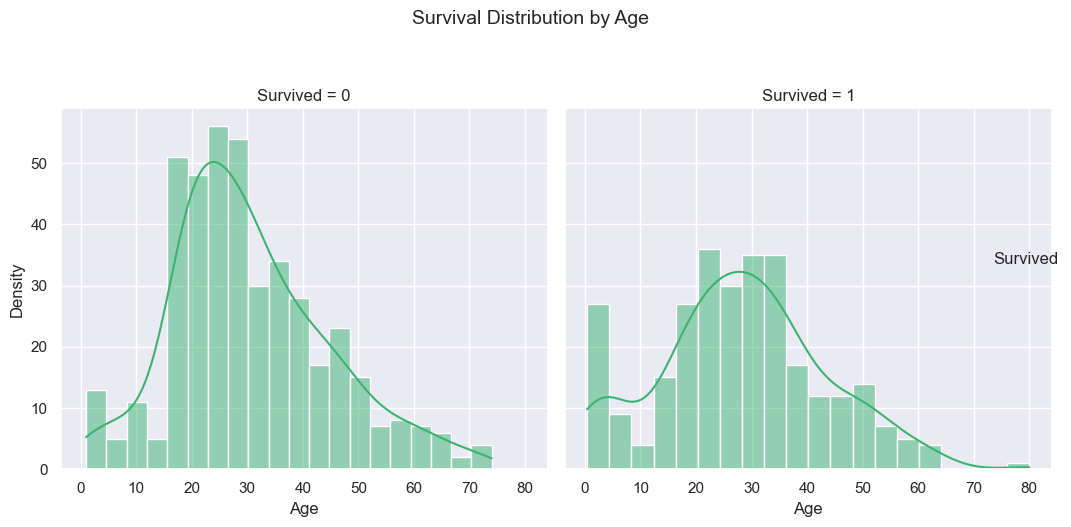

<Figure size 800x500 with 0 Axes>

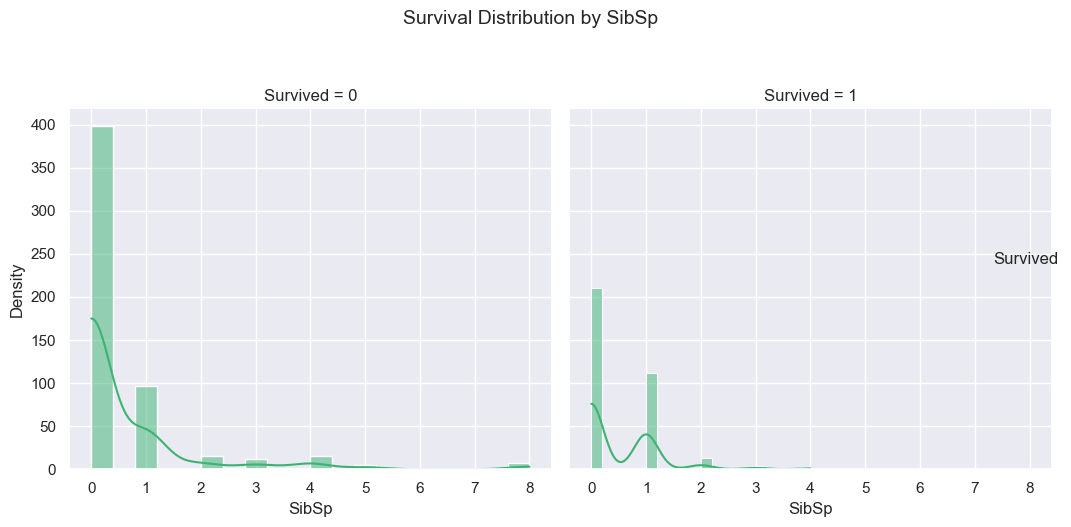

<Figure size 800x500 with 0 Axes>

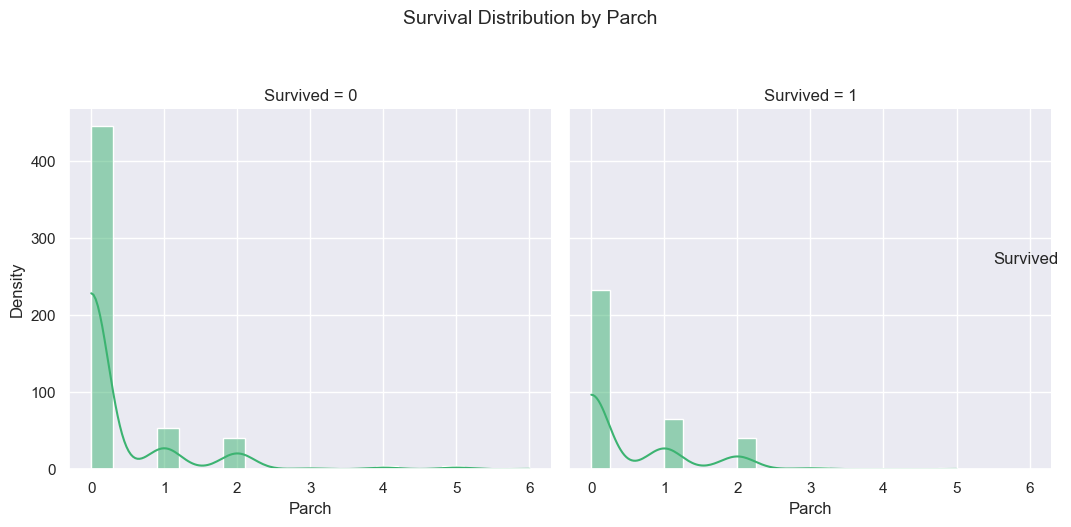

<Figure size 800x500 with 0 Axes>

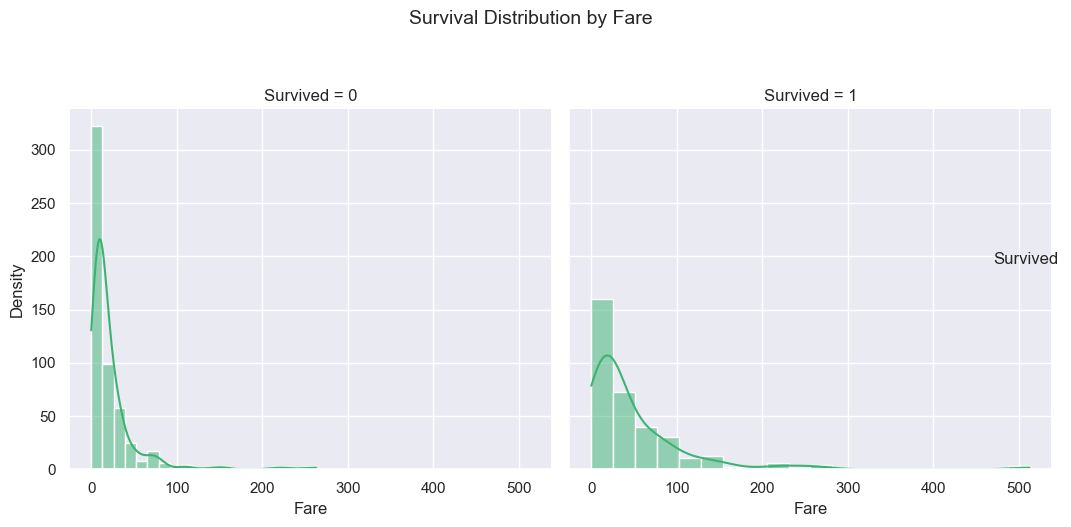

In [15]:
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    grid = sns.FacetGrid(df, col="Survived", height=5, aspect=1)
    grid.map_dataframe(sns.histplot, x=feature, bins=20, kde=True, color='mediumseagreen')
    grid.set_axis_labels(feature, 'Density')
    grid.add_legend(title='Survived')
    plt.suptitle(f'Survival Distribution by {feature}', y=1.05, fontsize=14)
    plt.tight_layout()
    plt.show()

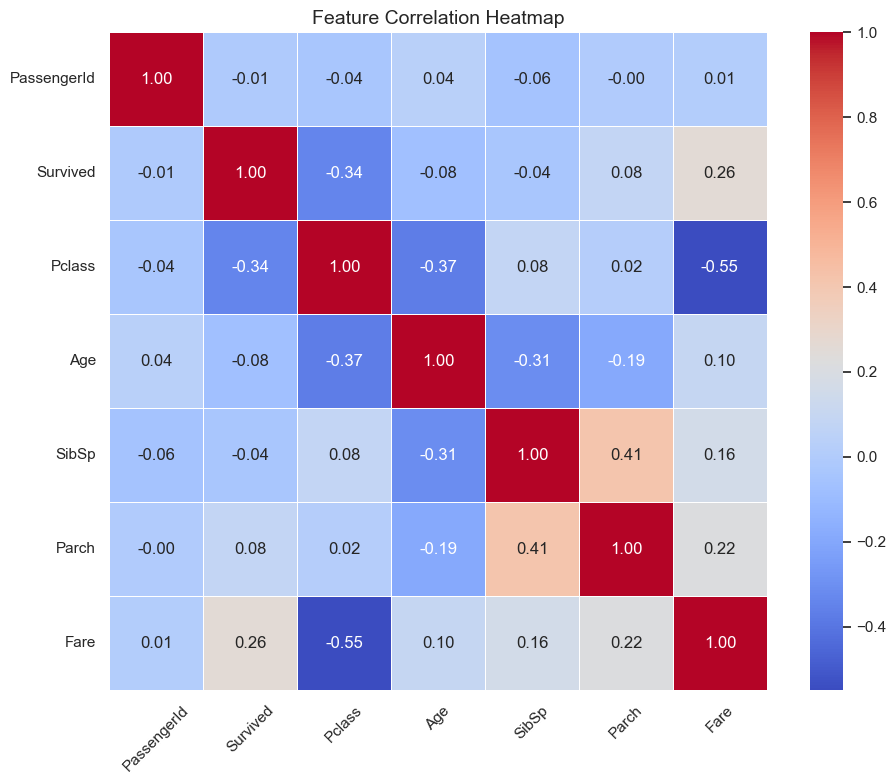

In [16]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Missing values in 'Embarked': 2


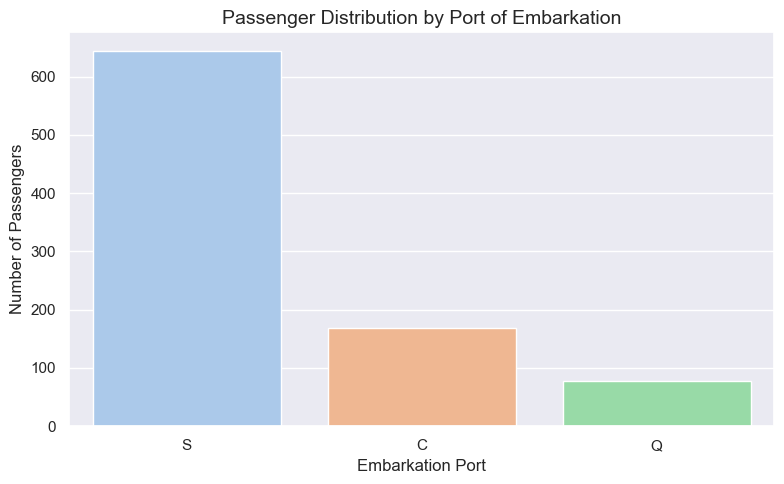

In [17]:
missing_embarked = df['Embarked'].isnull().sum()
print(f"Missing values in 'Embarked': {missing_embarked}")
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df_encoded = pd.concat([df, embarked_dummies], axis=1)
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=df, palette='pastel')
plt.title('Passenger Distribution by Port of Embarkation', fontsize=14)
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

Missing values in 'Age': 177


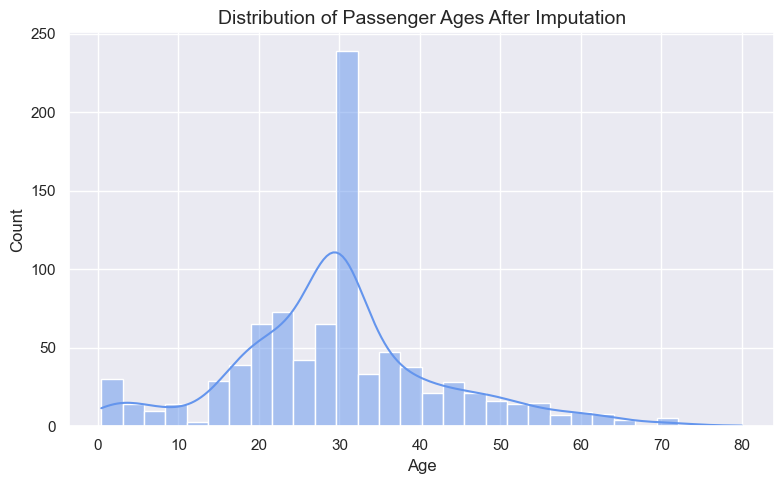

In [18]:
missing_age_count = df['Age'].isnull().sum()
print(f"Missing values in 'Age': {missing_age_count}")
average_age = df['Age'].mean()
df['Age'].fillna(average_age, inplace=True)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, color='cornflowerblue')
plt.title('Distribution of Passenger Ages After Imputation', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Missing values in 'Cabin': 687


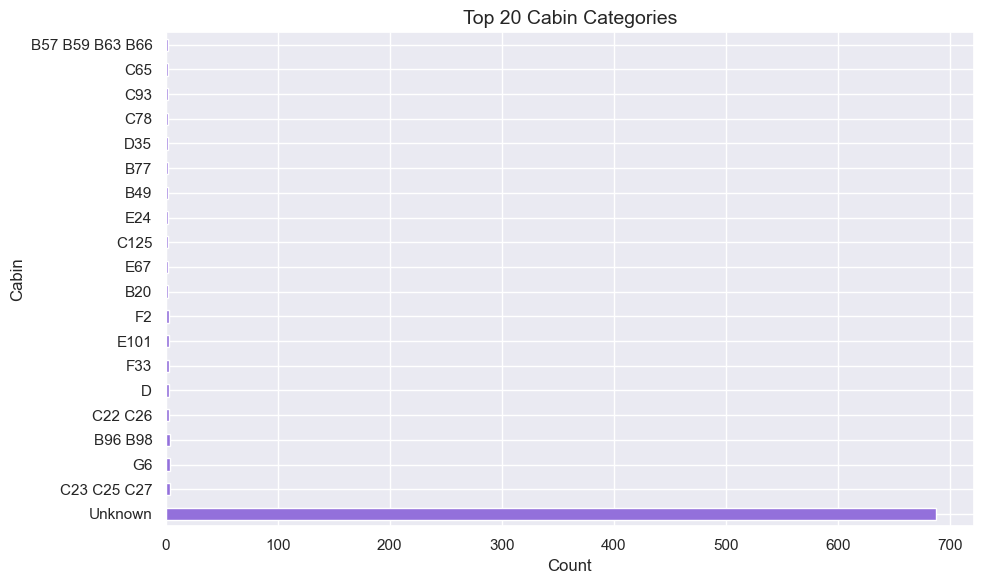

In [19]:
missing_cabin_count = df['Cabin'].isnull().sum()
print(f"Missing values in 'Cabin': {missing_cabin_count}")
df['Cabin'].fillna('Unknown', inplace=True)
plt.figure(figsize=(10, 6))
top_cabins = df['Cabin'].value_counts().head(20)
top_cabins.plot(kind='barh', color='mediumpurple')
plt.title('Top 20 Cabin Categories', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Cabin')
plt.tight_layout()
plt.show()

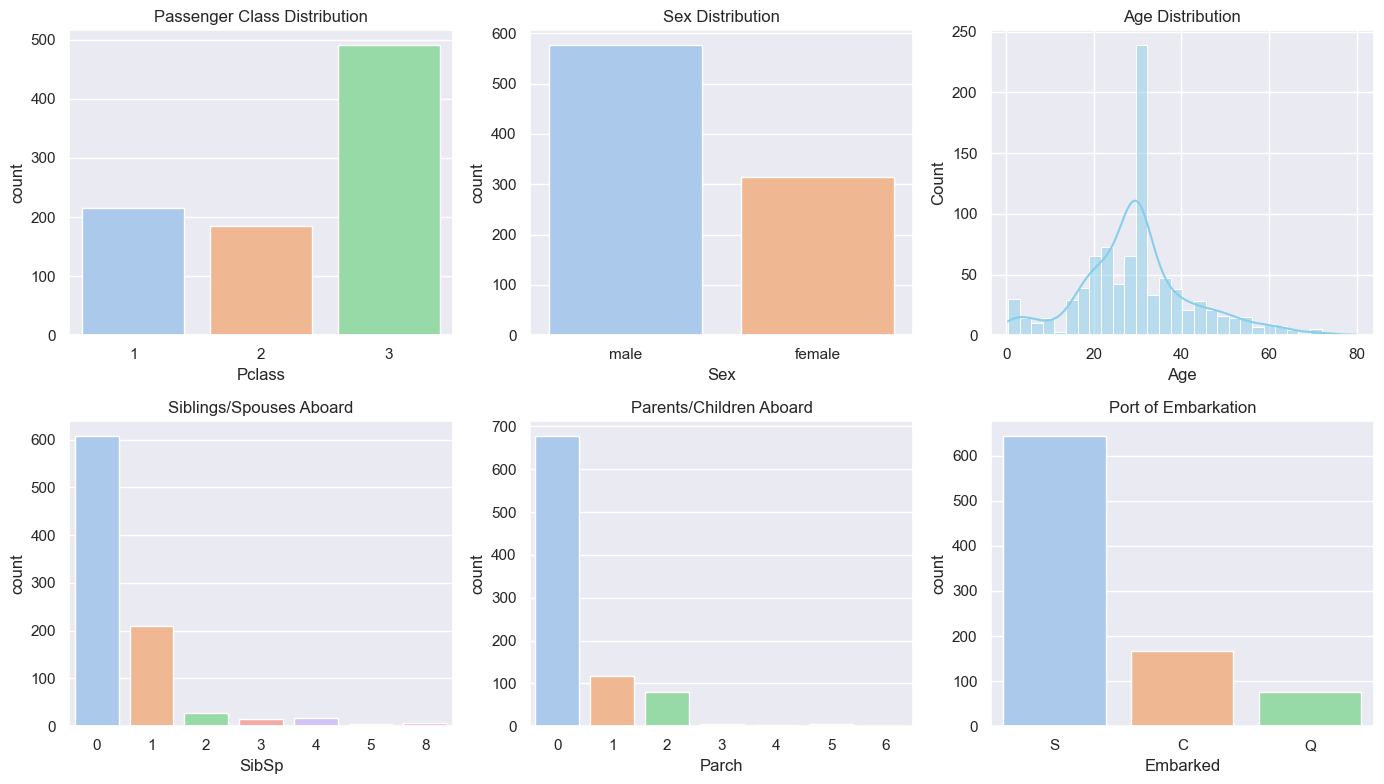

In [20]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Pclass', palette='pastel')
plt.title('Passenger Class Distribution')

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Sex Distribution')

plt.subplot(2, 3, 3)
sns.histplot(data=df, x='Age', kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='SibSp', palette='pastel')
plt.title('Siblings/Spouses Aboard')

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Parch', palette='pastel')
plt.title('Parents/Children Aboard')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Embarked', palette='pastel')
plt.title('Port of Embarkation')

plt.tight_layout()
plt.show()

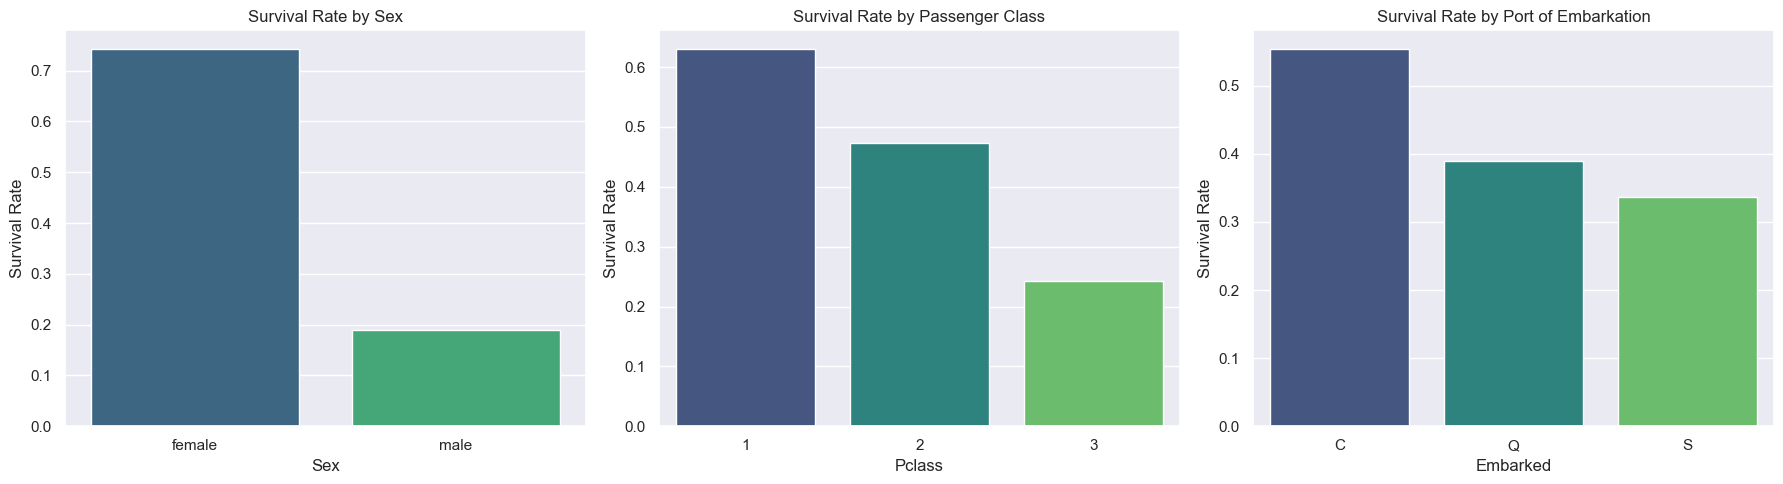

In [5]:
sex_pivot = df.pivot_table(index='Sex', values='Survived', aggfunc='mean')
pclass_pivot = df.pivot_table(index='Pclass', values='Survived', aggfunc='mean')
embarked_pivot = df.pivot_table(index='Embarked', values='Survived', aggfunc='mean')
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=sex_pivot.index, y=sex_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 2)
sns.barplot(x=pclass_pivot.index, y=pclass_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 3)
sns.barplot(x=embarked_pivot.index, y=embarked_pivot['Survived'], palette='viridis')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

### Handling Missing Values

In [6]:
missing_summary = df.isnull().sum()
print("Missing values before handling:\n", missing_summary)

median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)

most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)
df['SibSp'].fillna(0, inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum())

Missing values before handling:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


###  Visualizing Before vs After Handling Missing Data

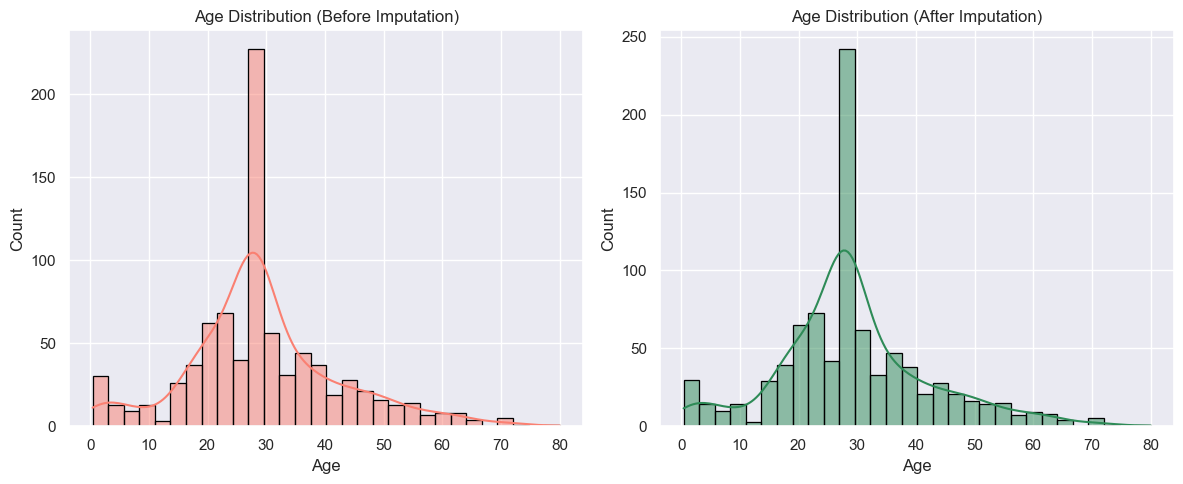

In [7]:
df_temp = df.copy()
df_temp.loc[np.random.choice(df_temp.index, 50, replace=False), 'Age'] = np.nan

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_temp['Age'], bins=30, kde=True, color='salmon', edgecolor='black')
plt.title('Age Distribution (Before Imputation)')

plt.subplot(1, 2, 2)
sns.histplot(df['Age'], bins=30, kde=True, color='seagreen', edgecolor='black')
plt.title('Age Distribution (After Imputation)')

plt.tight_layout()
plt.show()

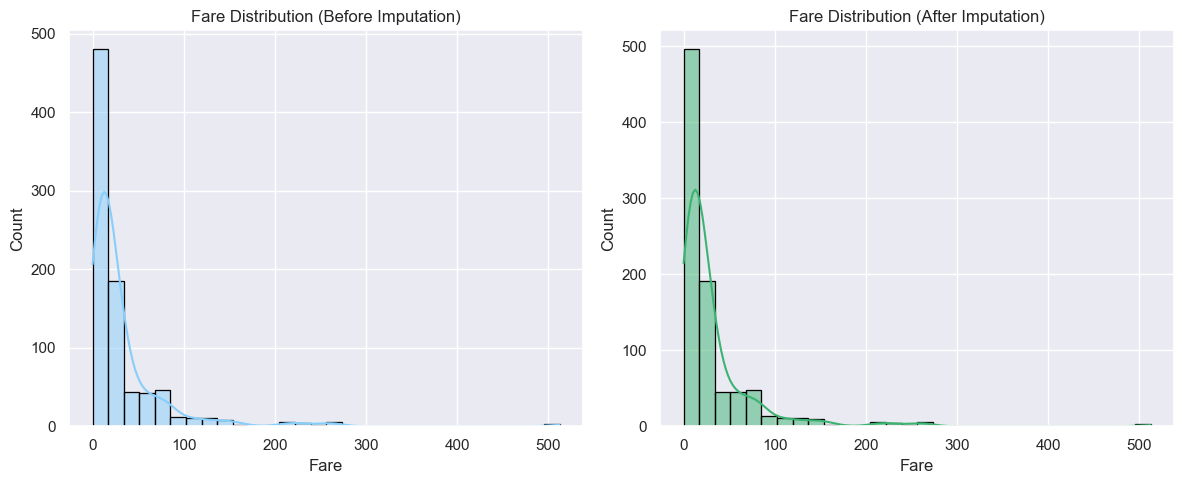

In [8]:
df_temp = df.copy()
df_temp.loc[np.random.choice(df_temp.index, 30, replace=False), 'Fare'] = np.nan

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_temp['Fare'], bins=30, kde=True, color='lightskyblue', edgecolor='black')
plt.title('Fare Distribution (Before Imputation)')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], bins=30, kde=True, color='mediumseagreen', edgecolor='black')
plt.title('Fare Distribution (After Imputation)')

plt.tight_layout()
plt.show()

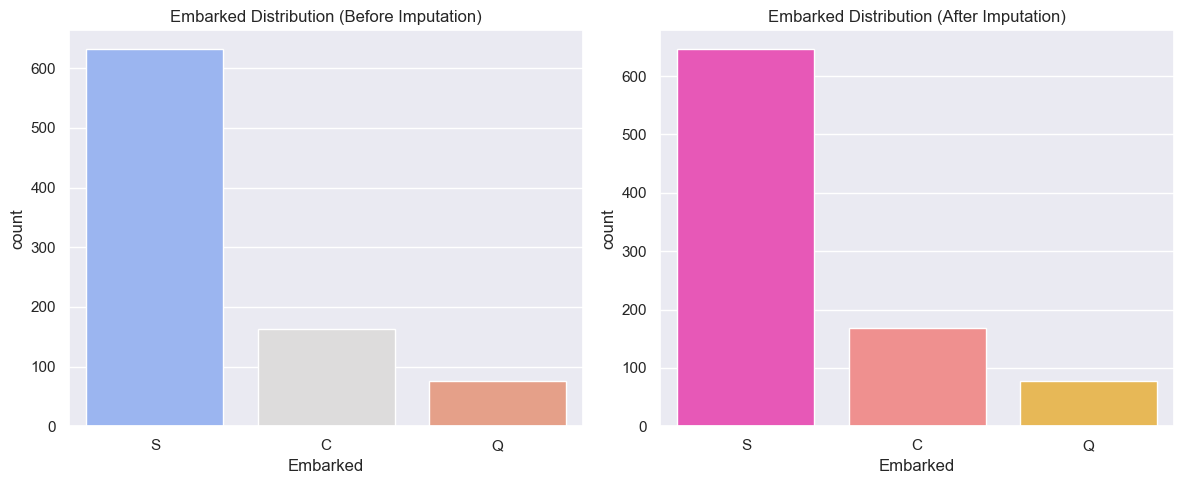

In [9]:
df_temp = df.copy()
df_temp.loc[np.random.choice(df_temp.index, 20, replace=False), 'Embarked'] = np.nan

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_temp, x='Embarked', palette='coolwarm')
plt.title('Embarked Distribution (Before Imputation)')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Embarked', palette='spring')
plt.title('Embarked Distribution (After Imputation)')

plt.tight_layout()
plt.show()

In [10]:
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns still containing missing values:", missing_columns)

Columns still containing missing values: ['Cabin']


### Feature Engineering

In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,AgeGroup,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Young Adult,0-20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Adult,60-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Young Adult,0-20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Adult,40-60
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Adult,0-20
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Mr,0,Young Adult,0-20
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,0,Senior,40-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,4,Child,20-40
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,2,Young Adult,0-20
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1,Child,20-40


In [15]:
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,AgeGroup,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Young Adult,0-20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Adult,60-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Young Adult,0-20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Adult,40-60
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Adult,0-20
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Mr,0,Young Adult,0-20
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,0,Senior,40-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,4,Child,20-40
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,2,Young Adult,0-20
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1,Child,20-40


In [17]:
fare_bins = [0, 20, 40, 60, 80, 1000]
fare_labels = ['0-20', '20-40', '40-60', '60-80', '80+']

df['FareCategory'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,AgeGroup,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Young Adult,0-20
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Adult,60-80
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Young Adult,0-20
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Adult,40-60
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Adult,0-20
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Mr,0,Young Adult,0-20
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,0,Senior,40-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,4,Child,20-40
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,2,Young Adult,0-20
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1,Child,20-40


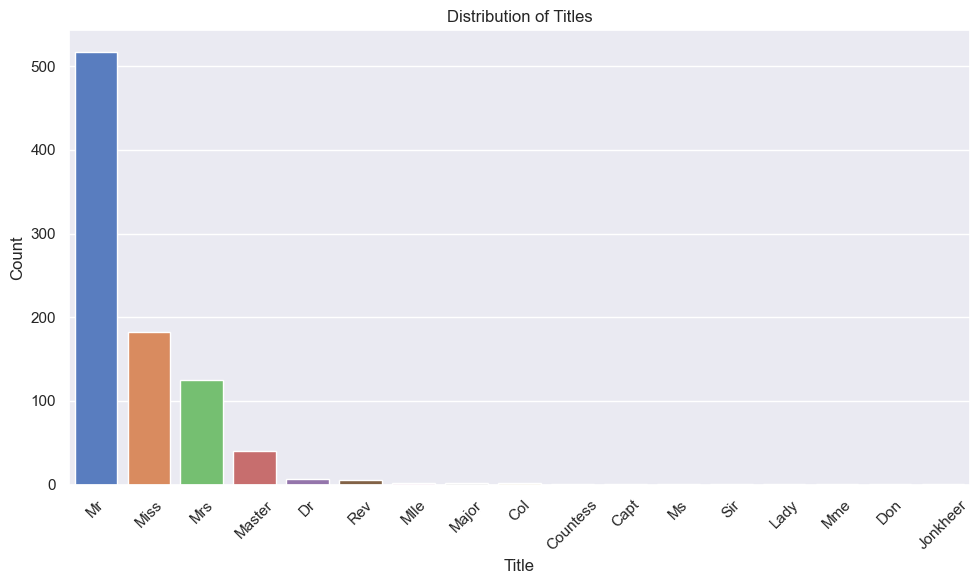

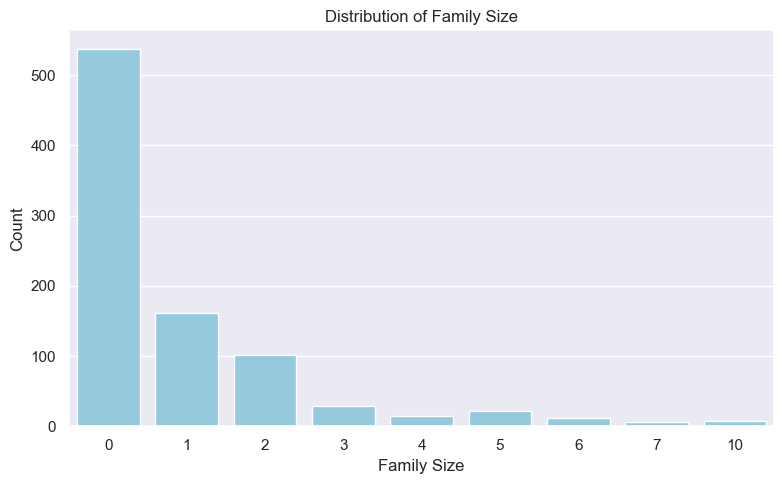

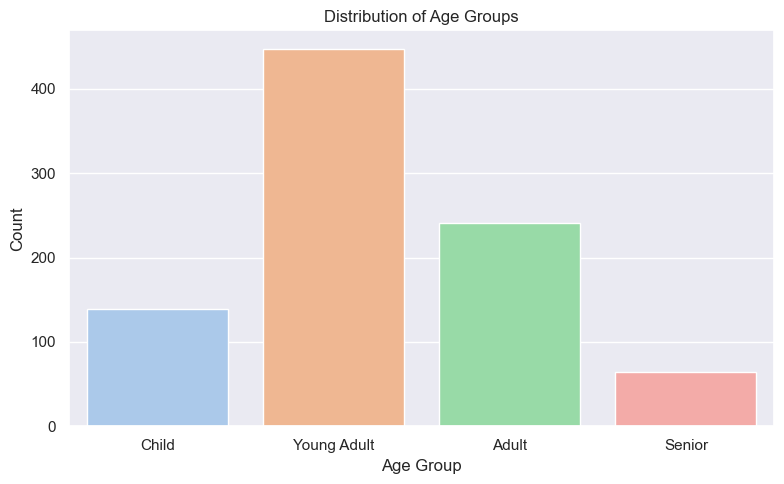

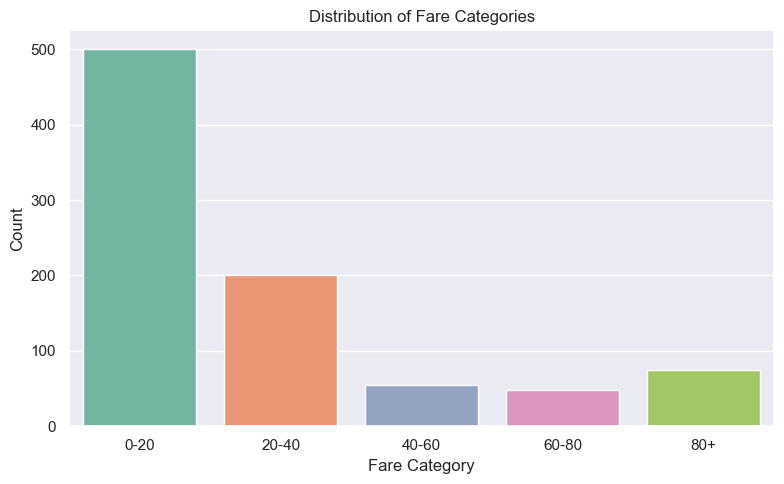

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Title', order=df['Title'].value_counts().index, palette='muted')
plt.title('Distribution of Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='FamilySize', color='skyblue')
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AgeGroup', order=age_labels, palette='pastel')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='FareCategory', order=fare_labels, palette='Set2')
plt.title('Distribution of Fare Categories')
plt.xlabel('Fare Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [22]:
df_encoded = pd.get_dummies(
    df, 
    columns=['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareCategory'], 
    drop_first=True
)

df_encoded.head(20)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Ms,Title_Rev,Title_Sir,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,FareCategory_20-40,FareCategory_40-60,FareCategory_60-80,FareCategory_80+
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,False,False,False,True,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,False,True,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,False,False,True,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,False,False,False,False,True,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,False,False,False,False,True,False,False,False,False,False
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,NaN,...,False,False,False,True,False,False,False,False,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,...,False,False,False,False,False,True,False,True,False,False
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,...,False,False,False,False,False,False,True,False,False,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,...,False,False,False,True,False,False,False,False,False,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,...,False,False,False,False,False,False,True,False,False,False


### Model Training and Evaluation

Accuracy: 0.8156

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       105
           1       0.76      0.81      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



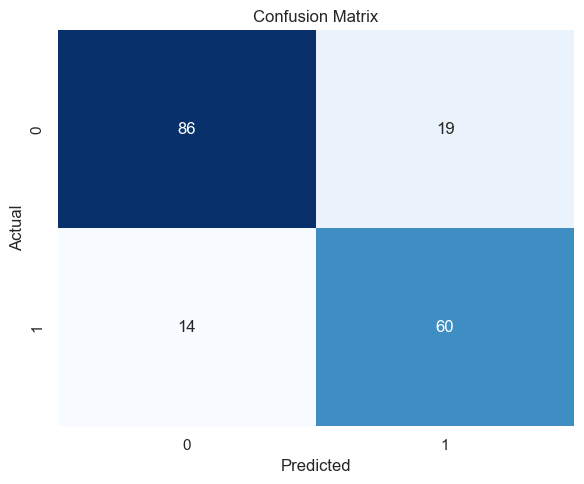

In [24]:

X = df_encoded.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()